In [6]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 matplotlib==3.7.2 --quiet

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.5 which is incompatible.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.2 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymn

In [7]:
import numpy as np
import matplotlib
import torch

print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("CUDA:", torch.cuda.is_available())


NumPy: 1.26.4
Matplotlib: 3.7.2
CUDA: True


In [8]:
%cd /kaggle/working
!rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


/kaggle/working
Cloning into 'yolov5'...
remote: Enumerating objects: 17778, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 17778 (delta 98), reused 51 (delta 51), pack-reused 17623 (from 3)
Receiving objects: 100% (17778/17778), 17.14 MiB | 32.26 MiB/s, done.
Resolving deltas: 100% (12077/12077), done.
/kaggle/working/yolov5


In [9]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/fallen-person-dataset/train/images
val: /kaggle/input/fallen-person-dataset/valid/images
test: /kaggle/input/fallen-person-dataset/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']


Overwriting /kaggle/working/data.yaml


In [10]:
!python train.py \
  --img 640 \
  --batch 32 \
  --epochs 100 \
  --data /kaggle/working/data.yaml \
  --weights yolov5s.pt \
  --name y5s_640_e100


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2026-01-02 22:11:06.812259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767391866.993775     495 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767391867.045637     495 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ImportError: cannot import name 'notf' from 'tensor

## Gerçek Zamanlılık (Speed / FPS Analizi – YOLOv5s)

Pre-process: ~0.2 ms

Inference: ~6.0 ms

NMS (Non-Maximum Suppression): ~1.3 ms

Toplam işlem süresi:

0.2 ms + 6.0 ms + 1.3 ms ≈ 7.5 ms / image


Bu süre, GPU ortamında yaklaşık olarak:

FPS ≈ 1000 / 7.5 ≈ 133 FPS

YOLOv5s modeli GPU üzerinde gerçek zamanlı çalışmaya uygun fakat YOLOv5n modeline kıyasla, Raspberry Pi 3 üstünde FPS değerinin daha belirgin şekilde düşebilir

Validation sırasında ölçülen hız çıktısı:

Speed: 0.2ms pre-process, 6.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)


In [21]:
%cd /kaggle/working/yolov5

!python val.py \
  --data /kaggle/working/data.yaml \
  --weights runs/train/y5s_640_e100/weights/best.pt \
  --img 640 \
  --batch 1 \
  --task speed \
  --device 0

/kaggle/working/yolov5
val: data=/kaggle/working/data.yaml, weights=['runs/train/y5s_640_e100/weights/best.pt'], batch_size=1, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=speed, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /kaggle/input/fallen-person-dataset/valid/labels... 576 images, 0 
val: WARNING ⚠️ Cache directory /kaggle/input/fallen-person-dataset/valid is not writeable: [Errno 30] Read-only file system: '/kaggle/input/fallen-person-dataset/valid/labels.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all        576        666      0.962    

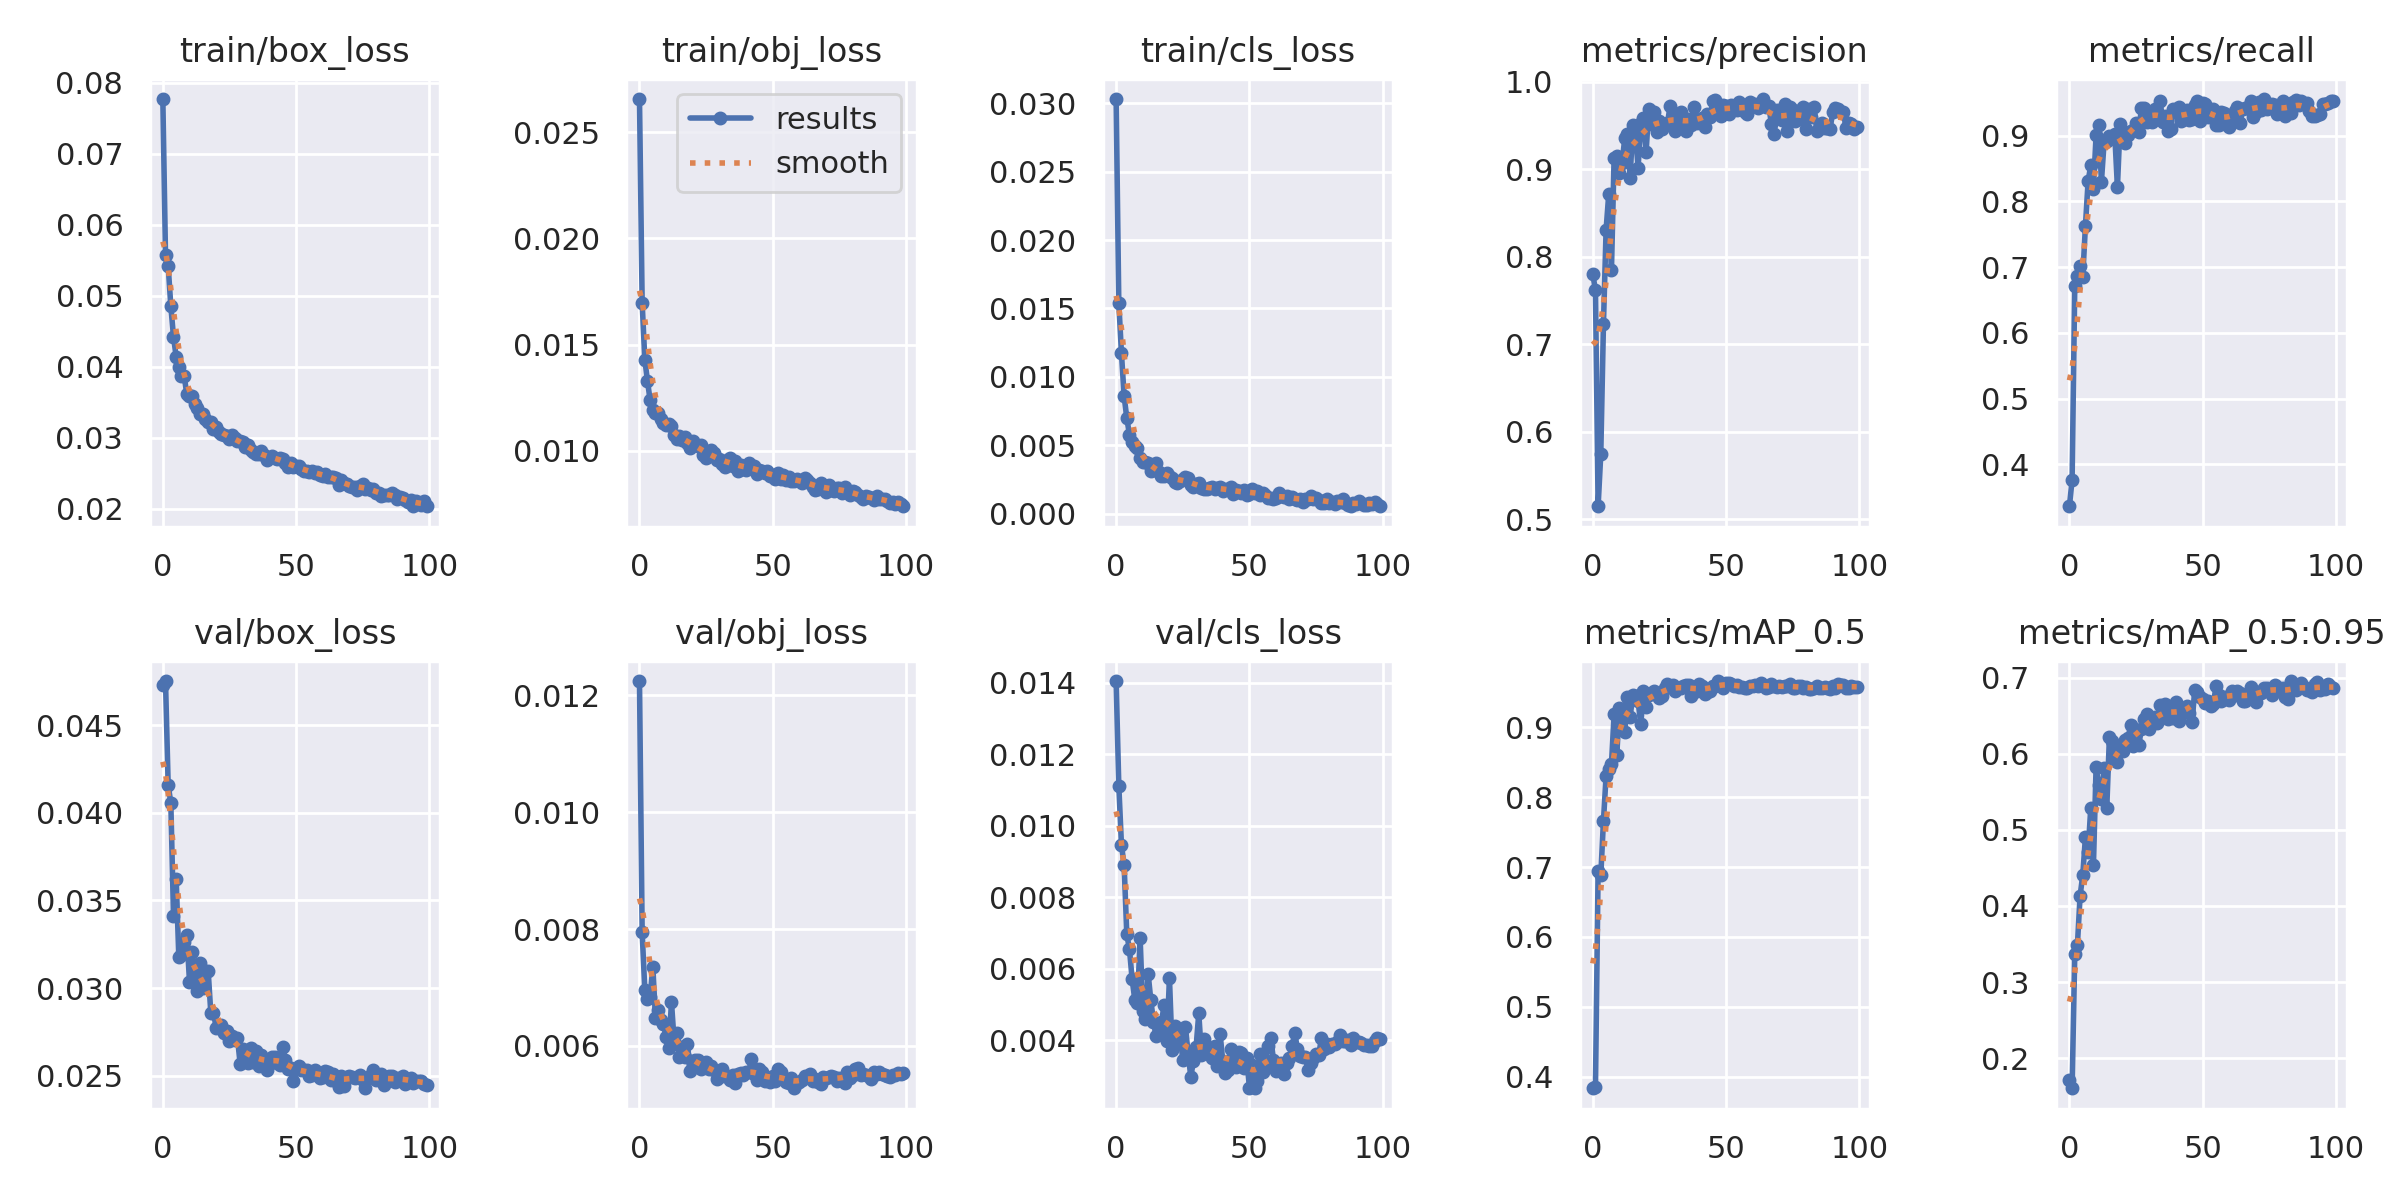

In [18]:
from IPython.display import Image, display
display(Image(filename="/kaggle/working/yolov5/runs/train/y5s_640_e100/results.png"))

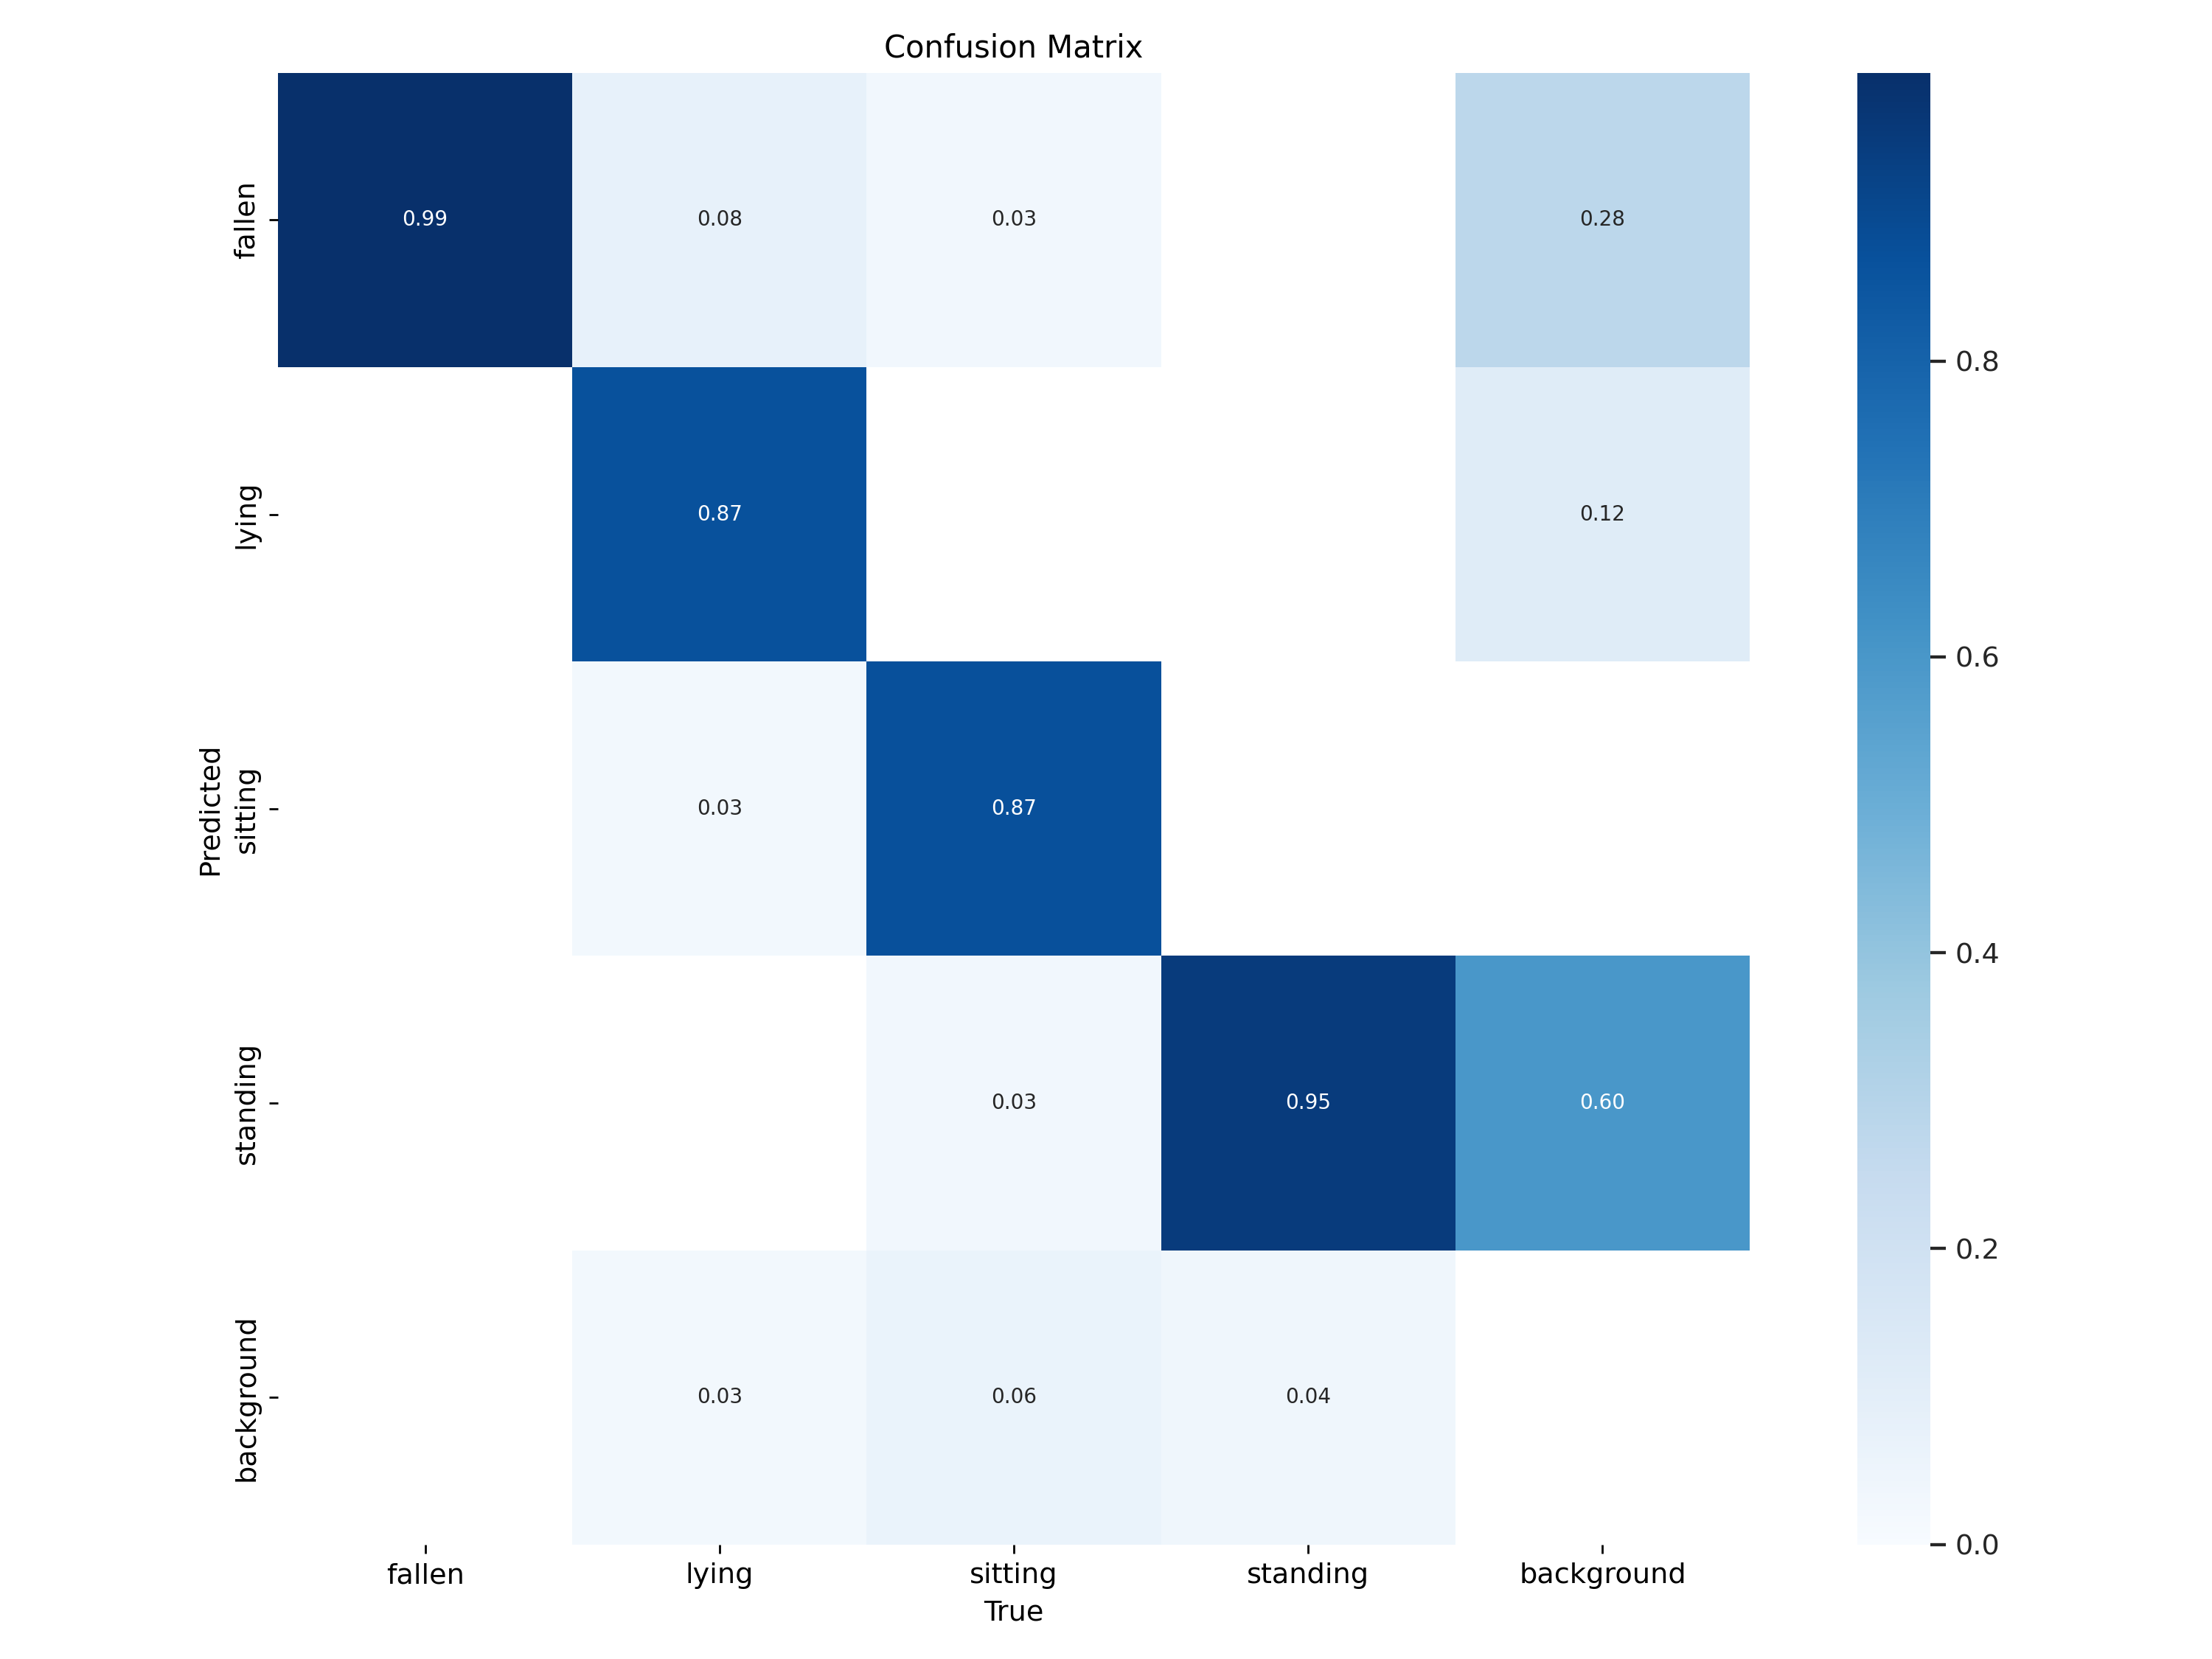

In [19]:
display(Image(filename="/kaggle/working/yolov5/runs/train/y5s_640_e100/confusion_matrix.png"))

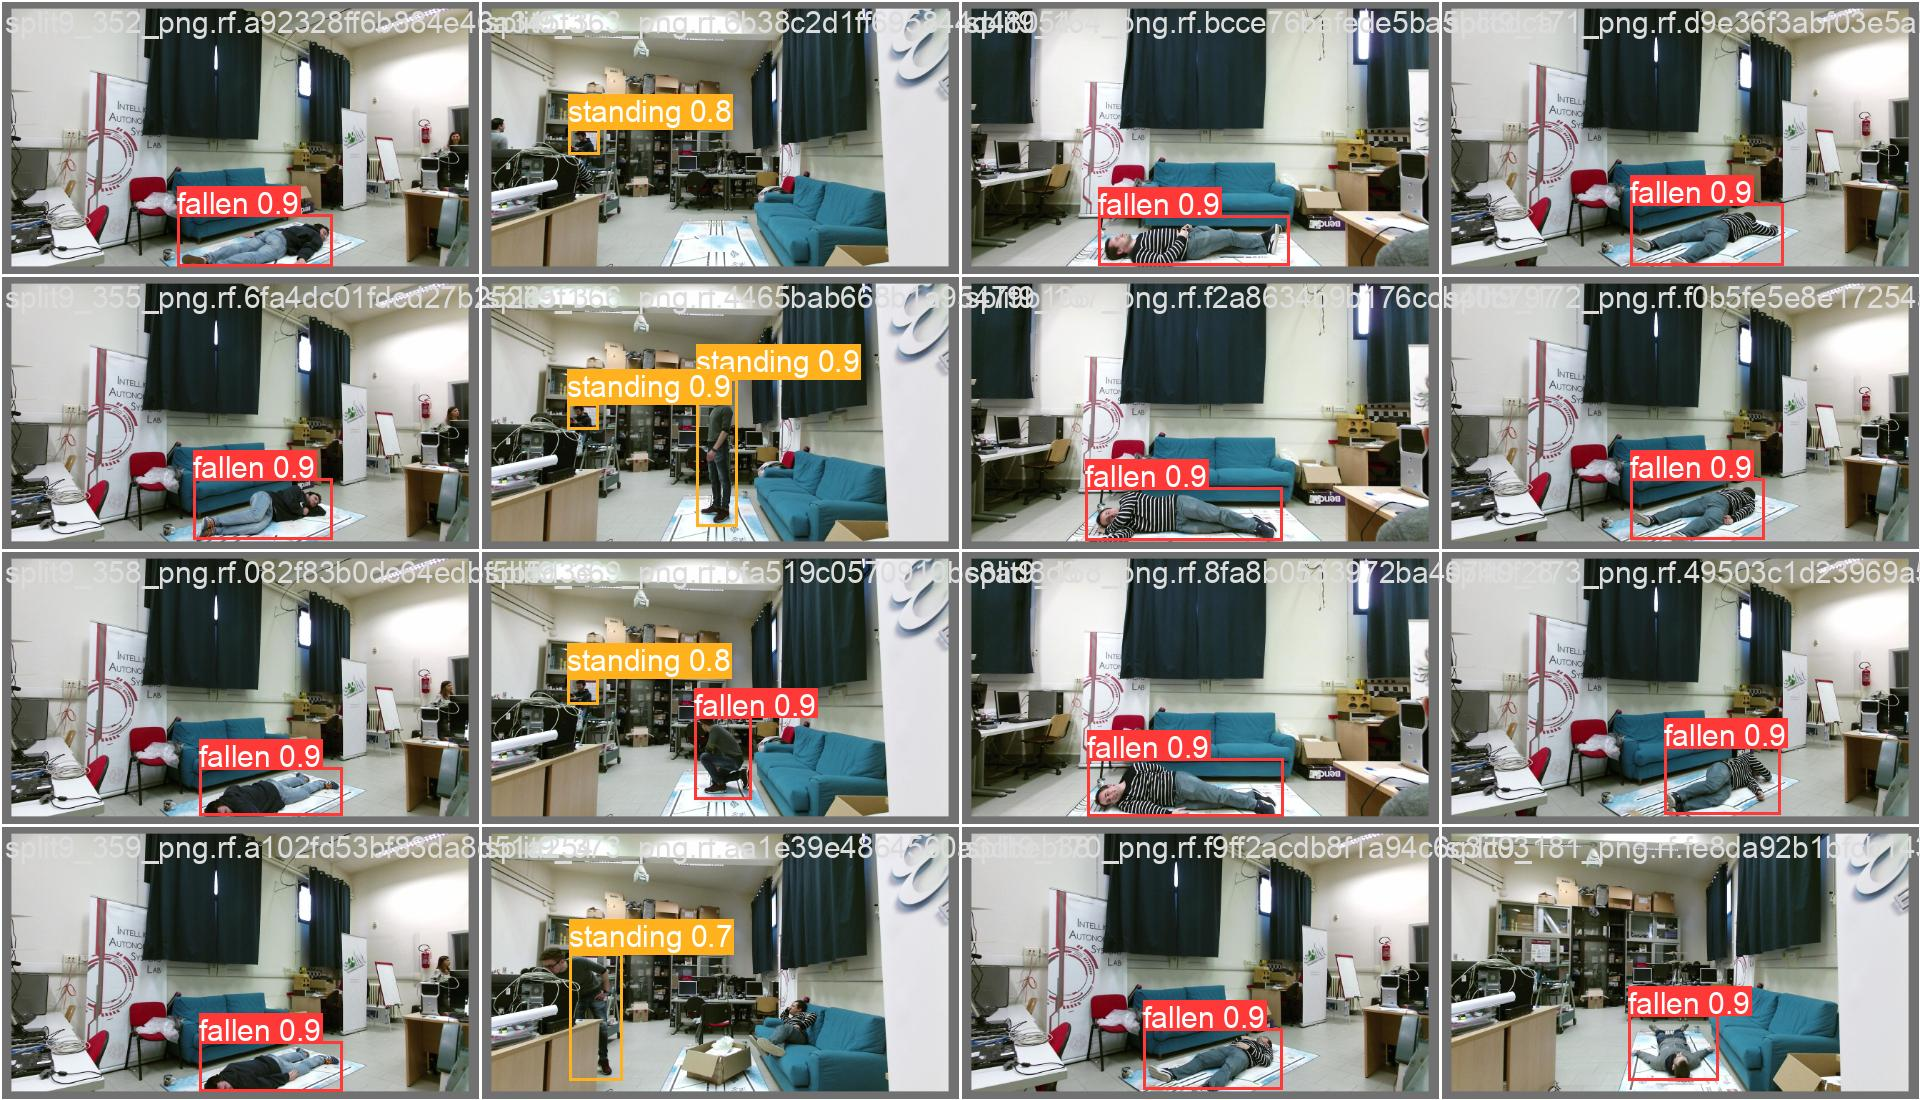

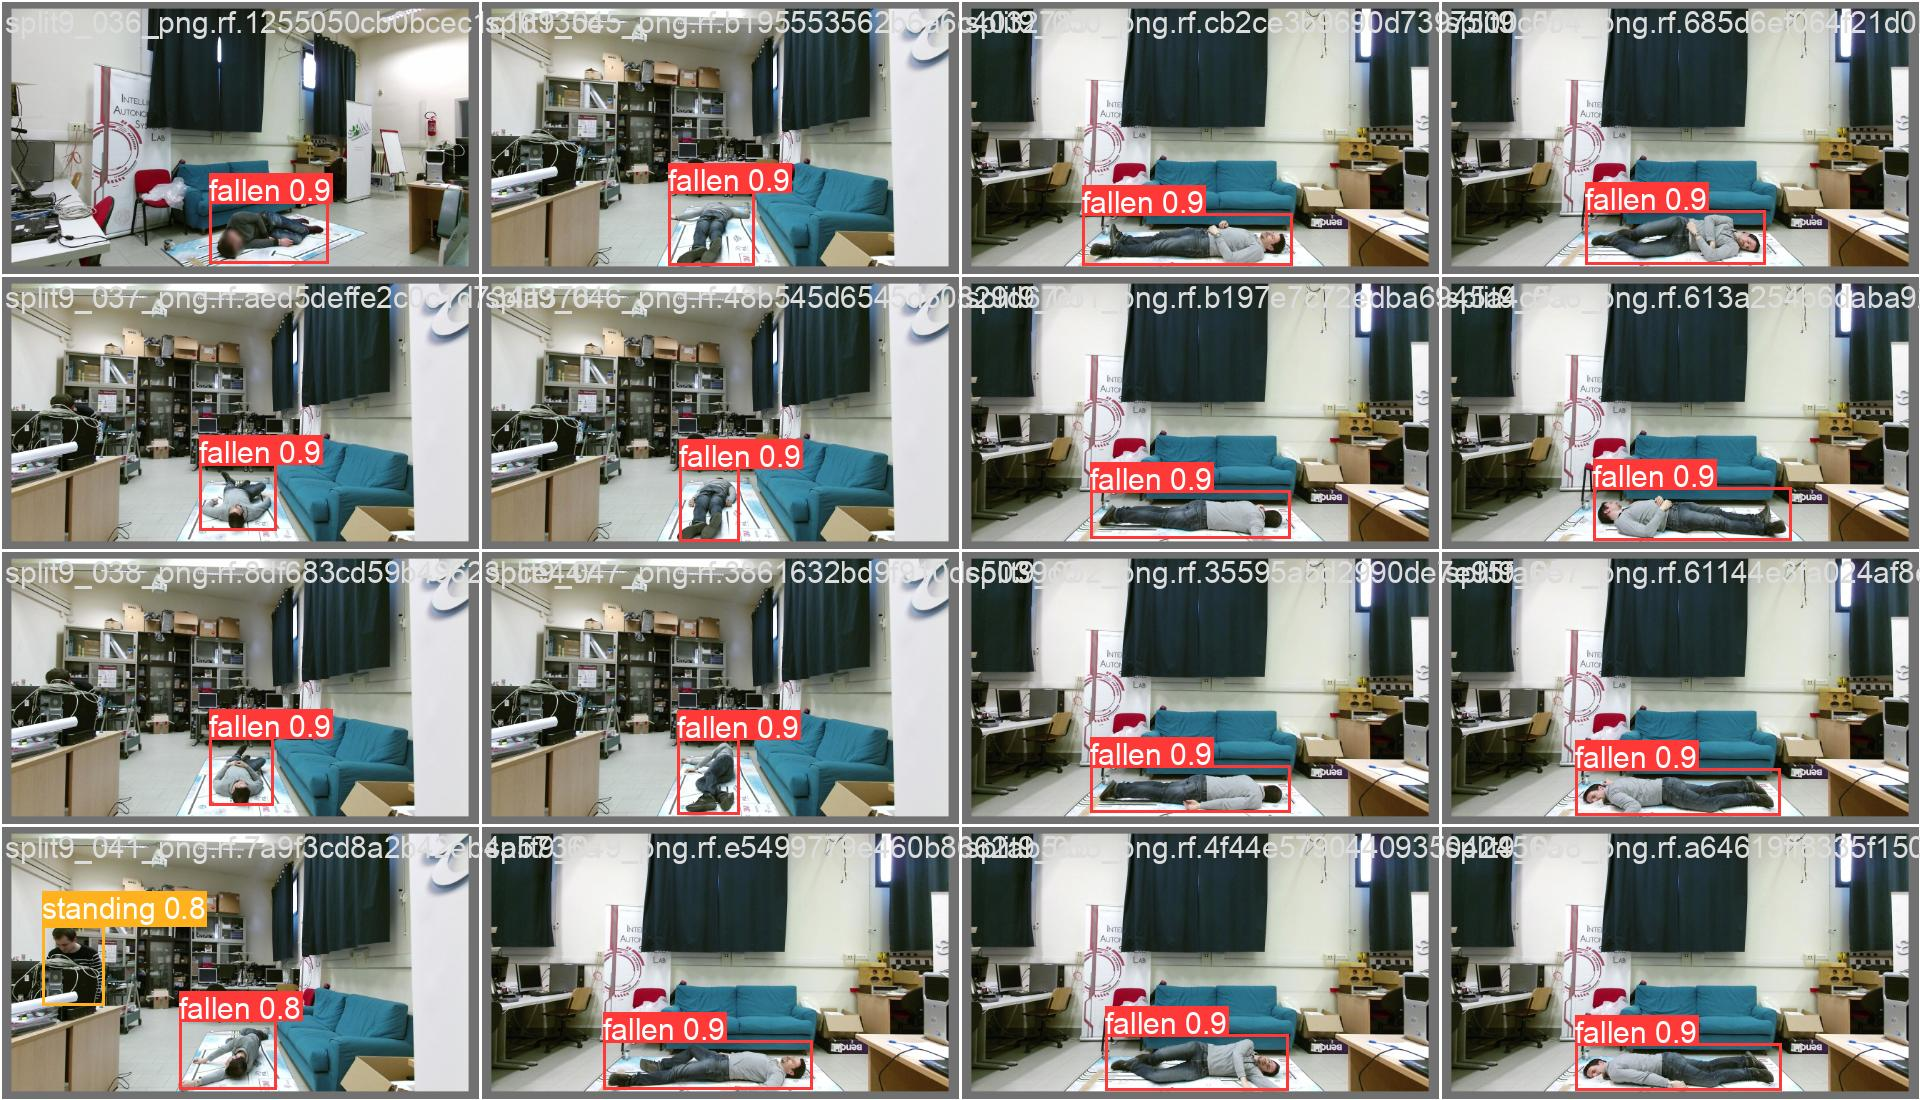

In [20]:
display(Image(filename="/kaggle/working/yolov5/runs/train/y5s_640_e100/val_batch0_pred.jpg"))
display(Image(filename="/kaggle/working/yolov5/runs/train/y5s_640_e100/val_batch1_pred.jpg"))